In [1]:
#%% Import libraries
import os
import cv2
import numpy as np
from numpy.fft import fft2, fftshift
from utils import  do_nothing
from utils import normalize_img
from utils import createCosineImage2
from utils import createWhiteDisk2
from utils import applyLogTransform
from utils import scaleImage2_uchar
path = '../img'

In [8]:
np.linspace(-1,1,3)

array([-1.,  0.,  1.])

In [13]:
x, y = np.meshgrid(np.linspace(-1,1,1000), 
                   np.linspace(-1,1,1000))

In [14]:
z = x**2 + y**2

2.0

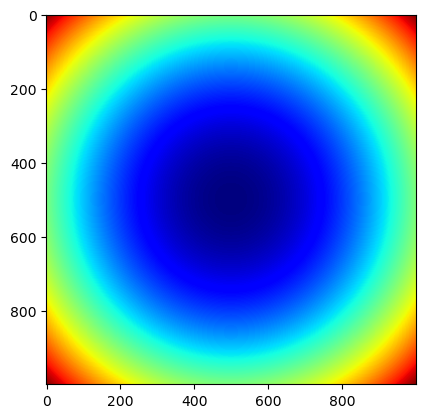

In [19]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap='jet')
z.max()

In [2]:
#%% Define functions
def createWhiteDisk(height = 100, width = 100, xc = 50, yc = 50, rc = 20):
    disk = np.zeros((height, width), np.float64)
    for x in range(disk.shape[0]):
        for y in range(disk.shape[1]):
            if (x - xc) * (x - xc) + (y - yc) * (y - yc) <= rc * rc:
                disk[x][y] = 1.0
    return disk

def createWhiteDisk2(height = 100, width = 100, xc = 50, yc = 50, rc = 20):
    xx, yy = np.meshgrid(range(height), range(width))
    img = np.array(
            ( (xx - xc)**2 + (yy - yc)**2 - rc**2  ) < 0).astype('float64')
    return img

def scaleImage2_uchar(src):
    tmp = np.copy(src)
    if src.dtype != np.float32:
        tmp = np.float32(tmp)
    cv2.normalize(tmp, tmp, 1, 0, cv2.NORM_MINMAX)
    tmp = 255 * tmp
    tmp = np.uint8(tmp)
    return tmp

def createCosineImage(height, width, freq, theta):
    img = np.zeros((height, width), dtype=np.float64)
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            img[x][y] = np.cos(
                    2 * np.pi * freq * (x * np.cos(theta) - y * np.sin(theta)))
    return img

def createCosineImage2(height, width, freq, theta):
    img = np.zeros((height, width), dtype=np.float64)
    xx, yy = np.meshgrid(range(height), range(width))
    theta = np.deg2rad(theta)
    rho = (xx * np.cos(theta) - yy * np.sin(theta))
    img[:] = np.cos(2 * np.pi * freq * rho)
    return img

def applyLogTransform(img):
    img2 = np.copy(img)
    img2 += 1
    img2 = np.log(img2)
    return img2

def create2DGaussian(rows = 100, 
                     cols = 100, 
                     mx = 50, 
                     my = 50, 
                     sx = 10, 
                     sy = 100,
                     theta = 0):
    
    xx0, yy0 = np.meshgrid(range(rows), range(cols))
    xx0 -= mx
    yy0 -= my
    theta = np.deg2rad(theta)
    xx = xx0 * np.cos(theta) - yy0 * np.sin(theta)
    yy = xx0 * np.sin(theta) + yy0 * np.cos(theta)
    try:
        img = np.exp( - ((xx**2)/(2*sx**2) + 
                         (yy**2)/(2*sy**2)) )
    except ZeroDivisionError:
        img = np.zeros((rows, cols), dtype='float64')
            
    cv2.normalize(img, img, 1, 0, cv2.NORM_MINMAX)
    return img

In [3]:
#%% Demonstrate the creation of a Gaussian filter
rows = 100
cols = 100

xc = 50
yc = 50
sx = 30
sy = 10
theta = 0

cv2.namedWindow('img', cv2.WINDOW_NORMAL | cv2.WINDOW_KEEPRATIO)
cv2.namedWindow('sliders', cv2.WINDOW_NORMAL | cv2.WINDOW_KEEPRATIO)

cv2.createTrackbar('xc', 'sliders', xc, int(rows), do_nothing)
cv2.createTrackbar('yc', 'sliders', yc, int(cols), do_nothing)
cv2.createTrackbar('sx', 'sliders', sx, int(rows), do_nothing)
cv2.createTrackbar('sy', 'sliders', sy, int(cols), do_nothing)
cv2.createTrackbar('theta', 'sliders', theta, 360, do_nothing)

while 0xFF & cv2.waitKey(1) != ord('q'):
    xc = cv2.getTrackbarPos('xc', 'sliders')
    yc = cv2.getTrackbarPos('yc', 'sliders')
    sx = cv2.getTrackbarPos('sx', 'sliders')
    sy = cv2.getTrackbarPos('sy', 'sliders')
    theta = cv2.getTrackbarPos('theta', 'sliders')
    img = create2DGaussian(rows, cols, xc, yc, sx, sy, theta)
    cv2.imshow('img', cv2.applyColorMap(scaleImage2_uchar(img), 
                                        cv2.COLORMAP_JET))
cv2.destroyAllWindows()